# Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")
test_df_y = pd.read_csv("../input/titanic/gender_submission.csv")

We have loaded the training data in titatanic_train_df, test data without the dependent variable i.e. 'Survived' in titanic_test_df and the test data of the dependent varibale i.e. 'Survived' in titanic_train_df .

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing of Data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see there are some missing values in the columns Age, Cabin and Embarked.

We can see the number of missing values for a particular column. We cannot say how much it is going to affect our prediction from the value itself. So we need to get the percentage of missing values out of total data available for the mentioned column.

In [5]:
train_df.isnull().sum()/len(train_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

we can see that for the column Age, the missing value is 19.87% which is a pretty big number. We need the age column to increase the prediction power. We can impute the missing values with median.
Next we see that the Cabin with 77.10% missing values. So we are going to drop it. 
And finally we are going to drop the Embarked with 0.22% missing values. Though we can impute the missing values with the most frequent boarding points.

In [6]:
train_df = train_df.dropna(subset=['Embarked'])
test_df=test_df.dropna(subset=['Embarked'])

In [7]:
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].median())
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].median())

In [8]:
#as cabin is irrelevant we will drop it
train_df.drop(columns="Cabin",inplace=True)
test_df.drop(columns="Cabin",inplace=True)

In [9]:
#Convert the Sex column to 0 and 1

varlist =  ['Sex']

# Defining the map function
def binary_map(x):
    return x.map({"male": 1, "female": 0})

# Applying the function to the housing list
train_df[varlist] = train_df[varlist].apply(binary_map)
test_df[varlist] = test_df[varlist].apply(binary_map)

In [10]:
#We will replace the Embarked column with the following values

train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
test_df['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)

In [11]:
test_df.isnull().sum()/len(test_df)*100

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.239234
Embarked       0.000000
dtype: float64

We can see there is a missing value in the Fare column for the test data. We will impute the same with zero.

In [12]:
test_df["Fare"]=test_df["Fare"].fillna(test_df["Fare"].mean())

In [13]:
# Now Let's see the test data inf
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Feature Selection

We will use the following features 'Pclass','Sex','Fare','Parch','Cabin','Embarked' and 'SibSp' for building the model and our dependent variable is 'Survived'. 

In [15]:
feature_column = ['Pclass','Sex','Age','Fare','Parch','Embarked','SibSp']
X_train = train_df[feature_column]
y_train = train_df['Survived']

X_test = test_df[feature_column]
y_test = test_df_y['Survived']

# Build and Train Model

### Using Decision Trees

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(random_state=42, max_depth=4)

dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       266
           1       0.96      0.91      0.94       152

    accuracy                           0.95       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



#### Plot the ROC curve

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


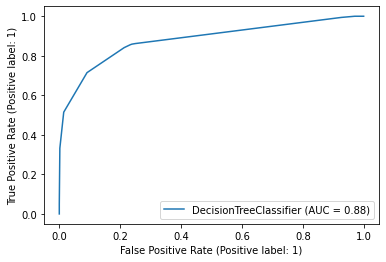

In [17]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [18]:
from sklearn.model_selection import GridSearchCV
dt1= DecisionTreeClassifier(random_state=42)

params = {"max_depth": [2,3,5,10,20],"min_samples_leaf": [5,10,20,50,100,500]}

grid_search = GridSearchCV(estimator=dt1,param_grid=params,cv=4,n_jobs=-1, verbose=1, scoring="accuracy")



Fitting 4 folds for each of 30 candidates, totalling 120 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


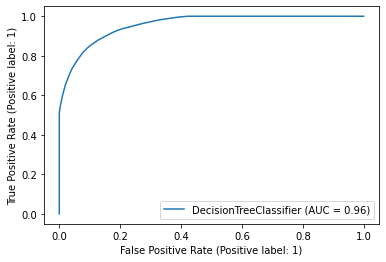

CPU times: user 691 ms, sys: 310 ms, total: 1 s
Wall time: 2.33 s


In [19]:
%%time
grid_search.fit(X_train, y_train)

grid_search.best_score_

dt_best = grid_search.best_estimator_
dt_best

plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [20]:
print('Accuracy of Decision Tree on the testing dataset is :{:.3f}'.format(dt_best.score(X_test,y_test)))

Accuracy of Decision Tree on the testing dataset is :0.864


### Using RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=42)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


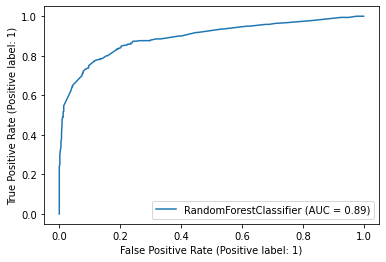

CPU times: user 323 ms, sys: 167 ms, total: 490 ms
Wall time: 246 ms


In [22]:
%%time
rf.fit(X_train, y_train)
plot_roc_curve(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [23]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators': [10, 25, 50, 100]}
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv = 4,n_jobs=-1, verbose=1, scoring="accuracy")

Fitting 4 folds for each of 120 candidates, totalling 480 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


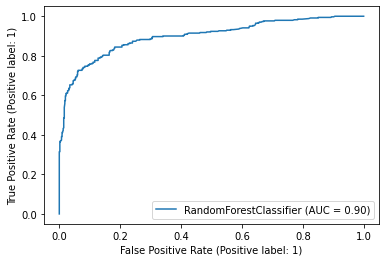

CPU times: user 3.05 s, sys: 305 ms, total: 3.35 s
Wall time: 36.9 s


In [24]:
%%time
grid_search.fit(X_train, y_train)

grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best

plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [25]:
# Let's see the features by importance

rf_best.feature_importances_

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Sex,0.462064
0,Pclass,0.168054
3,Fare,0.165298
2,Age,0.096128
6,SibSp,0.044946
4,Parch,0.032206
5,Embarked,0.031303


In [26]:
print('Accuracy of Random Forest on the testing dataset is :{:.3f}'.format(rf_best.score(X_test,y_test)))

Accuracy of Random Forest on the testing dataset is :0.902


### Using XGBoost

In [27]:
from xgboost import XGBClassifier
xgb_base = XGBClassifier()
xgb_base.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
y_train_pred = xgb_base.predict(X_train)
y_test_pred = xgb_base.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       266
           1       0.72      0.78      0.75       152

    accuracy                           0.81       418
   macro avg       0.79      0.80      0.80       418
weighted avg       0.81      0.81      0.81       418



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


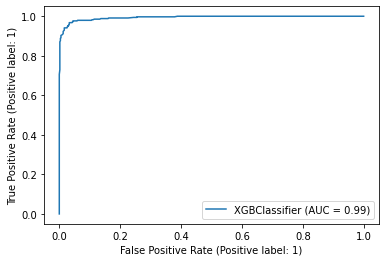

In [29]:
plot_roc_curve(xgb_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning using k-fold CV

In [30]:
# grid search
from sklearn.model_selection import StratifiedKFold
model = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [31]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.416589 using {'max_depth': 2, 'n_estimators': 100}
-0.418556 (0.091946) with: {'max_depth': 2, 'n_estimators': 50}
-0.416589 (0.091993) with: {'max_depth': 2, 'n_estimators': 100}
-0.422788 (0.091073) with: {'max_depth': 2, 'n_estimators': 150}
-0.429320 (0.094146) with: {'max_depth': 2, 'n_estimators': 200}
-0.426748 (0.091741) with: {'max_depth': 4, 'n_estimators': 50}
-0.449291 (0.105722) with: {'max_depth': 4, 'n_estimators': 100}
-0.469017 (0.118469) with: {'max_depth': 4, 'n_estimators': 150}
-0.492535 (0.127646) with: {'max_depth': 4, 'n_estimators': 200}
-0.453715 (0.103240) with: {'max_depth': 6, 'n_estimators': 50}
-0.487662 (0.119710) with: {'max_depth': 6, 'n_estimators': 100}
-0.524038 (0.133780) with: {'max_depth': 6, 'n_estimators': 150}
-0.553344 (0.145231) with: {'max_depth': 6, 'n_estimators': 200}
-0.466913 (0.113035) with: {'max_depth': 8, 'n_estimators': 50}
-0.520642 (0.137099) with: {'max_depth': 8, 'n_estimators': 100}
-0.554402 (0.148671) with: {'max_d

We could have selected arbitrary depth as 2 and estimators as 200 but from the above result we will go with max_depth as 2 and n_estimators as 150.  

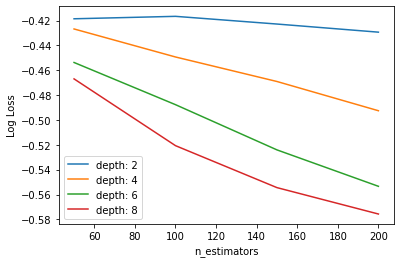

In [32]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

In [33]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=150)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [34]:
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                     

In [35]:
#Store the result in the dataframe

cv_results = pd.DataFrame(model_cv.cv_results_)

In [36]:
# Pulling out the best model

xgb_best = model_cv.best_estimator_

In [37]:
#Let's see inside the best xgb model

xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [38]:
# Let's check the feature importance
importance = dict(zip(X_train.columns, xgb_best.feature_importances_))
importance

{'Pclass': 0.20678386,
 'Sex': 0.335139,
 'Age': 0.09730516,
 'Fare': 0.09464805,
 'Parch': 0.098625034,
 'Embarked': 0.08435808,
 'SibSp': 0.08314082}

In [39]:
print('Accuracy of XGB the testing dataset is :{:.3f}'.format(xgb_best.score(X_test,y_test)))

Accuracy of XGB the testing dataset is :0.895


In [40]:
y_pred = xgb_best.predict(X_test)

In [41]:
my_submission = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)